#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd

#Loading Dataset

In [ ]:
dataset=pd.read_csv('/content/train (1).csv')
test_dataset=pd.read_csv('/content/test (1).csv')

In [ ]:
dataset.shape

(4250, 20)

In [ ]:
test_dataset.shape

(750, 20)

#Visualizing the prediction results in the data

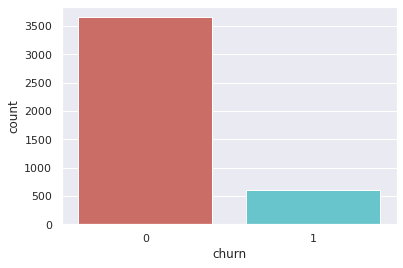

In [ ]:
sb.countplot(x='churn',data=dataset,palette='hls')
plt.show()

#Checking for Null Values

In [ ]:
dataset.isnull().sum()

#Dropping the Id in the test dataset

In [ ]:
#X = dataset.iloc[:, :-1].values
#y = dataset.iloc[:, -1].values
#m,n=X.shape

test_data=test_dataset.iloc[:,1:]

In [ ]:
test_data.shape

(750, 19)

In [ ]:
test_data.head()

#Label Encoding on Categorical Features

In [ ]:
from sklearn.preprocessing import LabelEncoder
def encode(i):
  le = LabelEncoder()
  dataset[i]=le.fit_transform(dataset[i])


for i in dataset:
  if(dataset[i].dtype==object):
    encode(i)




In [ ]:
from sklearn.preprocessing import LabelEncoder
def encode2(i):
  le = LabelEncoder()
  test_data[i]=le.fit_transform(test_data[i])

for i in test_data:
  if(test_data[i].dtype==object):
    encode2(i)



In [ ]:
test_data.shape

(750, 19)

#Checking Correlation in the data

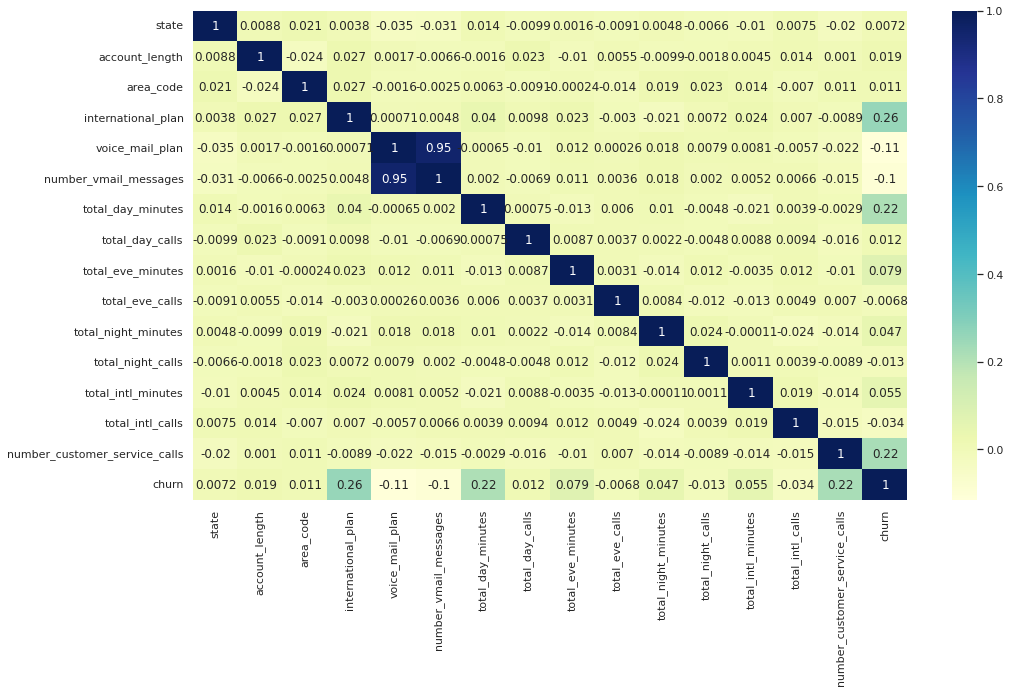

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
#print(dataset.corr())
  
# plotting correlation heatmap
plt.figure(figsize=(16,9))
sb.set()
dataplot = sb.heatmap(dataset.corr(method='pearson'), cmap="YlGnBu", annot=True)
  
plt.show()

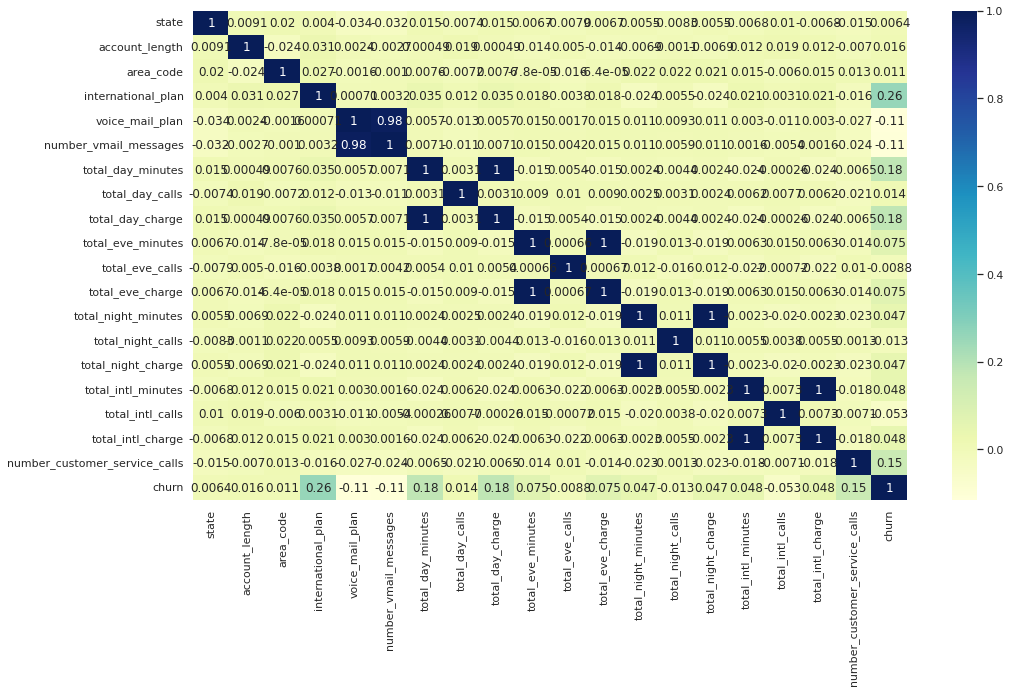

In [ ]:

# displaying heatmap
plt.figure(figsize=(16,9))
sb.set()
dataplot = sb.heatmap(dataset.corr(method='spearman'), cmap="YlGnBu", annot=True)
  
plt.show()

In [ ]:
def corr_features(corr_df,threshold):
  arr=corr_df.to_numpy()
  feat=set()
  for i in range(len(arr)):
    for j in range(len(arr)):
      if(j>i):
        if(arr[i,j]>=threshold or arr[i,j]<=-threshold):
         feat.add(corr_df.columns[j])
  return feat

In [ ]:
corr_df=dataset.corr(method="spearman")
feat=corr_features(corr_df,0.65)
print(feat)

{'total_eve_charge', 'total_night_charge', 'total_intl_charge', 'number_vmail_messages', 'total_day_charge'}


#Dropping correlated Features

In [ ]:
dataset=dataset.drop('total_intl_charge',axis=1)
dataset=dataset.drop('total_day_charge',axis=1)
dataset=dataset.drop('total_eve_charge',axis=1)
#dataset=dataset.drop('number_vmail_messages',axis=1)
dataset=dataset.drop('total_night_charge',axis=1)


In [ ]:
#test_data=test_data.drop('total_intl_charge',axis=1)
test_data=test_data.drop('total_day_charge',axis=1)
#test_data=test_data.drop('total_eve_charge',axis=1)
#test_data=test_data.drop('number_vmail_messages',axis=1)
#test_data=test_data.drop('total_night_charge',axis=1)


In [ ]:
test_data.shape

(750, 15)

In [ ]:
dataset.shape

(4250, 16)

#Spliting dataset according to dependent and independent features

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
m,n=X.shape

#Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#Training the Random Forest Classifier model on the Training set

In [ ]:
#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(random_state = 1)
#classifier.fit(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 1)
classifier.fit(X_train, y_train)
#from sklearn.neighbors import KNeighborsClassifier
#classifier = KNeighborsClassifier(n_neighbors = 100, metric = 'minkowski', p = 2)
#classifier.fit(X_train, y_train)
#from sklearn.naive_bayes import GaussianNB
#classifier = GaussianNB()
#classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=1)

#Saving the Model

In [ ]:
import joblib
#saving the model to the Disk
file_name='customer_churn'
joblib.dump(classifier,file_name)

['customer_churn']

#Loading the Modelfrom the Disk

In [ ]:
import joblib
#loading the model from Disk
loaded_model=joblib.load('/content/customer_churn')

#Predicting the Test Results

In [ ]:
y_pred = loaded_model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


#Making Confusion Matrix and calculating accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
#confusion matrix
print(cm)
#calculating the accuracy score of the model
print("accuracy")
print((accuracy_score(y_test, y_pred)*100))


[[921   2]
 [ 40 100]]
accuracy
96.04891815616182


#Predicting results for Test data file

In [ ]:
pred = classifier.predict(test_data)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print(pred)
print(test_data.shape)

In [ ]:
pred1=[]
for i in pred:
  if(i==0):
    pred1.append('no')
  else:
    pred1.append('yes')

In [ ]:

pred1=(np.array(pred1))
print(pred1)

#Predicted results file with an accuracy of 97.7% in Kaggle competition

In [ ]:
dict1={"id":[],
       "churn":[]}
submit=pd.DataFrame(dict1)
submit.shape
#select=df11[["Id"]]
#submit=select.copy()
submit["id"]=test_dataset["id"]
submit["churn"]=pred1
print(submit.shape)
submit.to_csv('submit1.csv',index=False)

(750, 2)
